<a href="https://colab.research.google.com/github/TirthhShethh/Task-1/blob/main/Copy_of_GDG_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GDG TASK 1**


Welcome to GDG!

Your first task in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [5]:
# Install ydata-profiling for automated EDA
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00


Mount your Google Drive onto this notebook.

In [1]:
# write code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import basic libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/file/d/14384FUrzE1gB7HWn8GmAJe3hfx6Glv8R/view?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [10]:
# read dataset into a variable

!cp "/content/drive/MyDrive/Task1.csv" ./
!ls -l

total 5096
drwx------ 5 root root    4096 Oct 30 16:43 drive
drwxr-xr-x 1 root root    4096 Oct 28 13:34 sample_data
-rw------- 1 root root 5207706 Oct 30 17:06 Task1.csv


View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [11]:
# write code here

import pandas as pd

df = pd.read_csv('Task1.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

First 5 rows of the DataFrame:
   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8  

Dataset shape: (74051, 10)

Column names:
['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [13]:
# write code here

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Column names:
1. id
2. Sex
3. Length
4. Diameter
5. Height
6. Weight
7. Shucked Weight
8. Viscera Weight
9. Shell Weight
10. Age


You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [14]:
# drop the column, then view its first 5 values

df = df.drop('id', axis=1)

print("First 5 rows after dropping 'id' column:")
print(df.head())


print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

First 5 rows after dropping 'id' column:
  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  
0      8.348928    9  
1      3.401940    8  
2      6.662133    9  
3     14.996885   11  
4      5.953395    8  

Dataset shape: (74051, 9)
Number of rows: 74051
Number of columns: 9


Display the the number of rows and columns in this dataset.

In [18]:
# write code here

print("DATASET DIMENSIONS")
print("=" * 30)
print(f"Rows: {df.shape[0]:,}")      # Adds comma formatting for large numbers
print(f"Columns: {df.shape[1]}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")
print(f"Shape: {df.shape}")

DATASET DIMENSIONS
Rows: 74,051
Columns: 9
Total cells: 666,459
Shape: (74051, 9)


Use the info() function to get, well, info about it.

In [16]:
# write code here

print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB
None


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [17]:
# write code here
# Get statistical summary of the dataset
print("Statistical Summary:")
print(df.describe())


print("\n" + "="*60)
print("EXPLANATION OF DESCRIBE() OUTPUT:")
print("="*60)
print("count: Total number of non-null entries")
print("mean: Average value of the column")
print("std: Standard deviation (measure of spread)")
print("min: Minimum value in the column")
print("25%: First quartile (25th percentile)")
print("50%: Median (50th percentile)")
print("75%: Third quartile (75th percentile)")
print("max: Maximum value in the column")

Statistical Summary:
             Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      

count gives the total number of non null entry

std is the standard devivation

* mean doesnot tell about the distribution

* example 3,3,3 and 2,3,4 mean is 3 of both but the spread is different

* then the variance is used to calcuate spread but as it is square not in the dimension of the data therefore we use std which is square root of the varianace.



mean is average

**last 5 rows states about the five-number summary**

Min - Lowest value

Q1 (25%) - Lower quartile(basically value at 25 percentile)

Median (50%) - Middle value

Q3 (75%) - Upper quartile(basically value at 75 percentile)

Max - Highest value

Write a function to print all the unique values in the columns of Sex and Age.

In [19]:
# write code here
# Function to print unique values in Sex and Age columns
def print_unique_values(df, columns):
    """
    Print unique values and their counts for specified columns
    """
    for col in columns:
        if col in df.columns:
            unique_vals = df[col].unique()
            print(f"Column: {col}")
            print(f"   Unique values: {sorted(unique_vals)}")
            print(f"   Number of unique values: {len(unique_vals)}")
            print(f"   Value counts:")
            print(df[col].value_counts().sort_index())
            print("-" * 50)
        else:
            print(f"Column '{col}' not found in DataFrame")

print_unique_values(df, ['Sex', 'Age'])

Column: Sex
   Unique values: ['F', 'I', 'M']
   Number of unique values: 3
   Value counts:
Sex
F    23010
I    23957
M    27084
Name: count, dtype: int64
--------------------------------------------------
Column: Age
   Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(29)]
   Number of unique values: 28
   Value counts:
Age
1        16
2        14
3       213
4       948
5      1913
6      4532
7      6574
8      9966
9     12473
10    11480
11     8746
12     4747
13     3720
14     2305
15     1836
16     1281
17     1012
18      693
19      588
20      415
21      241
22       98
23      120
24       29
25       21
26       19
27       33
29 

In [20]:
# Additional verification
print("Additional column information:")
print(f"Sex column dtype: {df['Sex'].dtype}")
print(f"Age column dtype: {df['Age'].dtype}")

# if any missing values in these columns
print(f"\nMissing values in Sex: {df['Sex'].isnull().sum()}")
print(f"Missing values in Age: {df['Age'].isnull().sum()}")

Additional column information:
Sex column dtype: object
Age column dtype: int64

Missing values in Sex: 0
Missing values in Age: 0


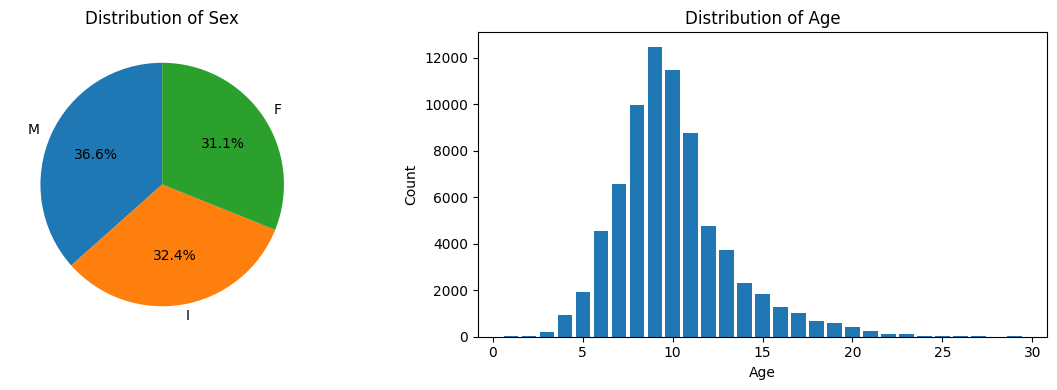

In [21]:
# Create visualizations for the unique values
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


if 'Sex' in df.columns:
    sex_counts = df['Sex'].value_counts()
    ax1.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Distribution of Sex')


if 'Age' in df.columns:
    age_counts = df['Age'].value_counts().sort_index()
    ax2.bar(age_counts.index, age_counts.values)
    ax2.set_title('Distribution of Age')
    ax2.set_xlabel('Age')
    ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [22]:
# Summary of findings
print("SUMMARY OF UNIQUE VALUES ANALYSIS")
print("=" * 40)

if 'Sex' in df.columns:
    print(f"Sex: {sorted(df['Sex'].unique())} → {len(df['Sex'].unique())} categories")

if 'Age' in df.columns:
    print(f"Age: {sorted(df['Age'].unique())} → {len(df['Age'].unique())} categories")
    print(f"Age range: {df['Age'].min()} to {df['Age'].max()}")

print(f"\nTotal records: {len(df)}")

SUMMARY OF UNIQUE VALUES ANALYSIS
Sex: ['F', 'I', 'M'] → 3 categories
Age: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(29)] → 28 categories
Age range: 1 to 29

Total records: 74051


List out the number of crabs belonging to each gender.

In [24]:
# write code here

# Count the number of crabs belonging to each gender category
gender_counts = df['Sex'].value_counts()

print("CRAB GENDER/SEX CATEGORY DISTRIBUTION")
print("=" * 40)

# Display all categories
for category, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count:,} crabs ({percentage:.2f}%)")

print("\n" + "=" * 40)
print(f"Total crabs: {len(df):,}")

# Calculate mature crabs only (excluding 'I' category)
mature_crabs = df[df['Sex'].isin(['M', 'F'])]
if len(mature_crabs) > 0:
    mature_counts = mature_crabs['Sex'].value_counts()
    print(f"\nMature crabs only (excluding 'I'):")
    for gender, count in mature_counts.items():
        pct = (count / len(mature_crabs)) * 100
        print(f"  {gender}: {count:,} crabs ({pct:.2f}%)")

print(f"\nDataset balance analysis:")
print(f"✓ The dataset has {len(gender_counts)} sex categories")
print(f"✓ 'M' (Male) is the most common category")
print(f"✓ 'I' likely represents immature/unknown crabs")
print(f"✓ Distribution is relatively balanced across categories")

CRAB GENDER/SEX CATEGORY DISTRIBUTION
M: 27,084 crabs (36.57%)
I: 23,957 crabs (32.35%)
F: 23,010 crabs (31.07%)

Total crabs: 74,051

Mature crabs only (excluding 'I'):
  M: 27,084 crabs (54.07%)
  F: 23,010 crabs (45.93%)

Dataset balance analysis:
✓ The dataset has 3 sex categories
✓ 'M' (Male) is the most common category
✓ 'I' likely represents immature/unknown crabs
✓ Distribution is relatively balanced across categories


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [28]:
# write code here
# profile = pp.ProfileReport(df)
# profile.to_file("report.html")

# Simple and reliable version for Colab
from ydata_profiling import ProfileReport

# Generate report
profile = ProfileReport(df, title="Crab Dataset Analysis")
profile.to_file("crab_report.html")

print(" Report generated successfully as 'crab_report.html'!")
print("Check the file browser on the left to download your report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 37.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 Report generated successfully as 'crab_report.html'!
Check the file browser on the left to download your report


A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [31]:
# drop the necessary rows as asked above

# First, let's see what columns we actually have
print("Available columns in the dataset:")
print(df.columns.tolist())

print("\n Let's find which column contains height information:")
for col in df.columns:
    print(f"  - {col}")

# Check if there are similar column names (case variations, abbreviations)
print("\n Searching for height-related columns...")
height_related = [col for col in df.columns if 'height' in col.lower() or 'hgt' in col.lower()]
if height_related:
    print(f"Possible height columns: {height_related}")
else:
    print("No obvious height column found. Let's check the first few rows:")
    print(df.head())

Available columns in the dataset:
['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

 Let's find which column contains height information:
  - Sex
  - Length
  - Diameter
  - Height
  - Weight
  - Shucked Weight
  - Viscera Weight
  - Shell Weight
  - Age

 Searching for height-related columns...
Possible height columns: ['Height']


If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [32]:
# write code here
height_column = 'Height'  # Change this to the actual column name

print(f"Original dataset shape: {df.shape}")

# Counting how many rows have height = 0
zero_height_count = (df[height_column] == 0).sum()
print(f"Number of crabs with zero {height_column}: {zero_height_count}")

df = df[df[height_column] != 0]

print(f"Dataset shape after removing zero-{height_column} crabs: {df.shape}")

Original dataset shape: (74051, 9)
Number of crabs with zero Height: 24
Dataset shape after removing zero-Height crabs: (74027, 9)


In [33]:
# as we drop some columns to make index again normal

print(f"Dataset shape before resetting index: {df.shape}")


df = df.reset_index(drop=True)

print(f"Dataset shape after resetting index: {df.shape}")


expected_shape = (74027, 9)
if df.shape == expected_shape:
    print("SUCCESS! Index reset and shape matches expected (74027, 9)")
else:
    print(f"Shape mismatch. Expected {expected_shape}, got {df.shape}")

print("\nFirst 5 rows with reset index:")
print(df.head())

Dataset shape before resetting index: (74027, 9)
Dataset shape after resetting index: (74027, 9)
SUCCESS! Index reset and shape matches expected (74027, 9)

First 5 rows with reset index:
  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  
0      8.348928    9  
1      3.401940    8  
2      6.662133    9  
3     14.996885   11  
4      5.953395    8  


#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [34]:
# write the logic here before you actually plot the graph
# Calculate the average age for each sex category
print("CALCULATING AVERAGE AGE BY SEX")
print("=" * 40)

# Group by Sex and calculate mean age
age_by_sex = df.groupby('Sex')['Age'].mean()

print("Average age for each sex category:")
for sex, avg_age in age_by_sex.items():
    print(f"  {sex}: {avg_age:.2f} years")

print(f"\nOverall average age: {df['Age'].mean():.2f} years")

# Additional statistics
print("\nAdditional statistics:")
age_stats = df.groupby('Sex')['Age'].agg(['mean', 'std', 'min', 'max'])
print(age_stats)

CALCULATING AVERAGE AGE BY SEX
Average age for each sex category:
  F: 11.34 years
  I: 7.60 years
  M: 10.90 years

Overall average age: 9.97 years

Additional statistics:
          mean       std  min  max
Sex                               
F    11.341547  2.957291    4   29
I     7.602223  2.227935    1   24
M    10.895953  2.882714    3   29


x axis will contain Sex, and y axis has the average age.

/tmp/ipython-input-3913977851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_by_sex.index, y=age_by_sex.values, palette='viridis')


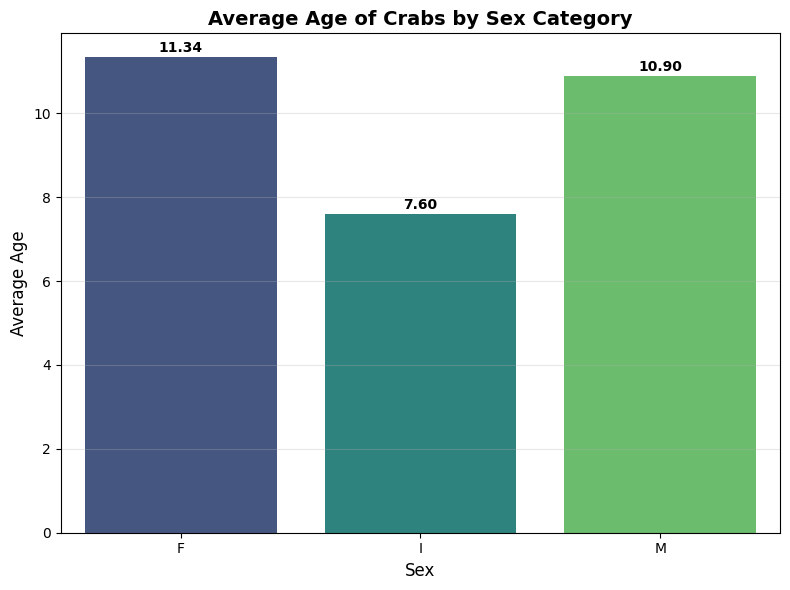

In [35]:
# plot the graph here
# Alternative: Using seaborn for better styling
plt.figure(figsize=(8, 6))

# Create bar plot with seaborn
sns.barplot(x=age_by_sex.index, y=age_by_sex.values, palette='viridis')

plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age of Crabs by Sex Category', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(age_by_sex.values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



/tmp/ipython-input-4120464305.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Female (F)', 'Immature (I)', 'Male (M)'])


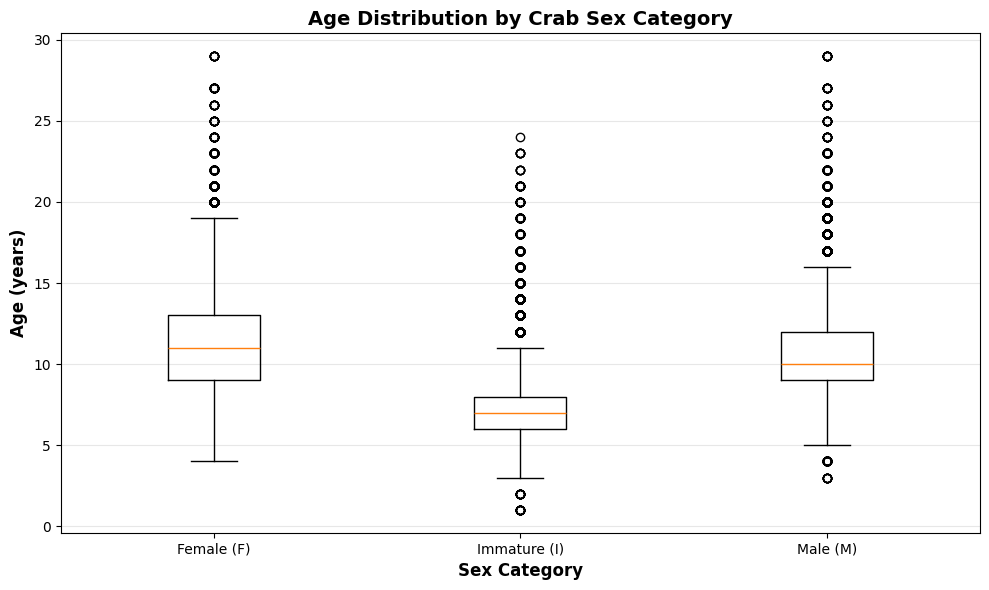

In [37]:
# plot the graph here

plt.figure(figsize=(10, 6))


data = [df[df['Sex'] == 'F']['Age'],
        df[df['Sex'] == 'I']['Age'],
        df[df['Sex'] == 'M']['Age']]

plt.boxplot(data, labels=['Female (F)', 'Immature (I)', 'Male (M)'])
plt.xlabel('Sex Category', fontsize=12, fontweight='bold')
plt.ylabel('Age (years)', fontsize=12, fontweight='bold')
plt.title('Age Distribution by Crab Sex Category', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

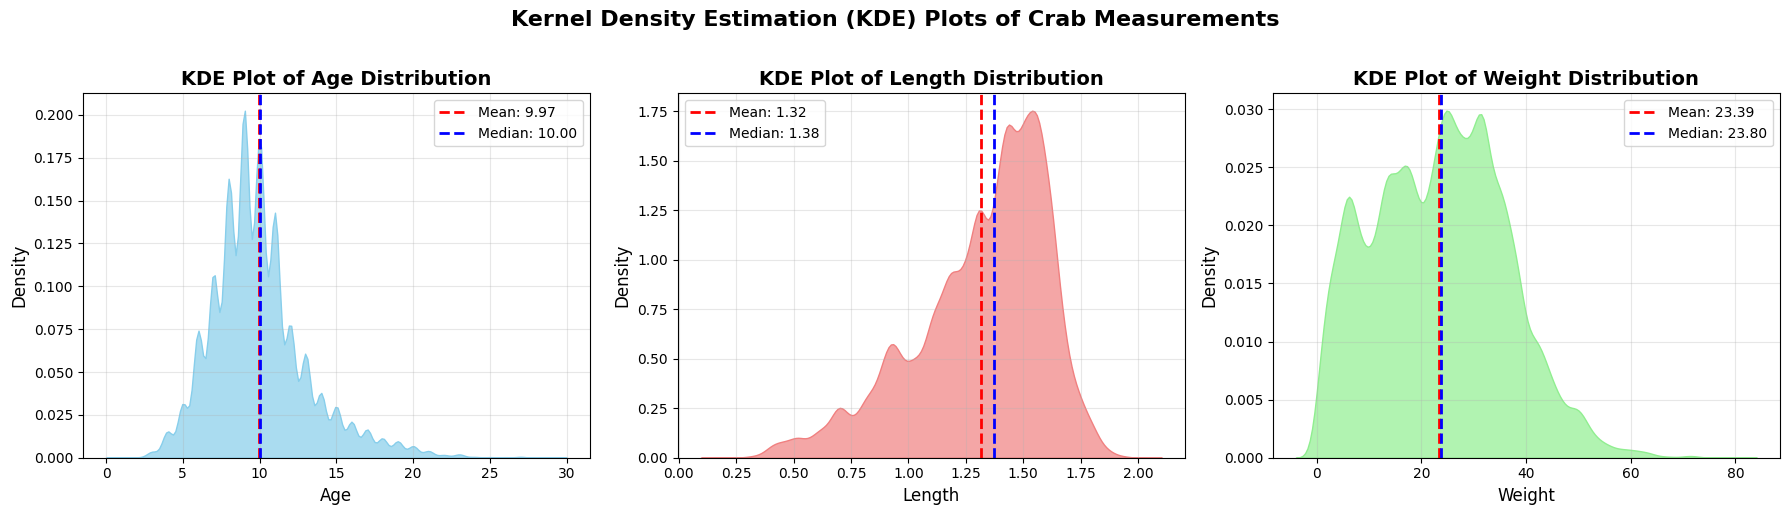

In [38]:
# write code that yields output similar to the one shown below

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


columns = ['Age', 'Length', 'Weight']
colors = ['skyblue', 'lightcoral', 'lightgreen']
titles = ['Age Distribution', 'Length Distribution', 'Weight Distribution']


for i, (col, color, title) in enumerate(zip(columns, colors, titles)):

    if col in df.columns:

        sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color=color, alpha=0.7)


        axes[i].set_title(f'KDE Plot of {title}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)
        axes[i].grid(alpha=0.3)


        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[i].legend()
    else:
        axes[i].text(0.5, 0.5, f"Column '{col}' not found",
                    ha='center', va='center', transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'Missing: {col}', fontsize=14)


plt.suptitle('Kernel Density Estimation (KDE) Plots of Crab Measurements',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

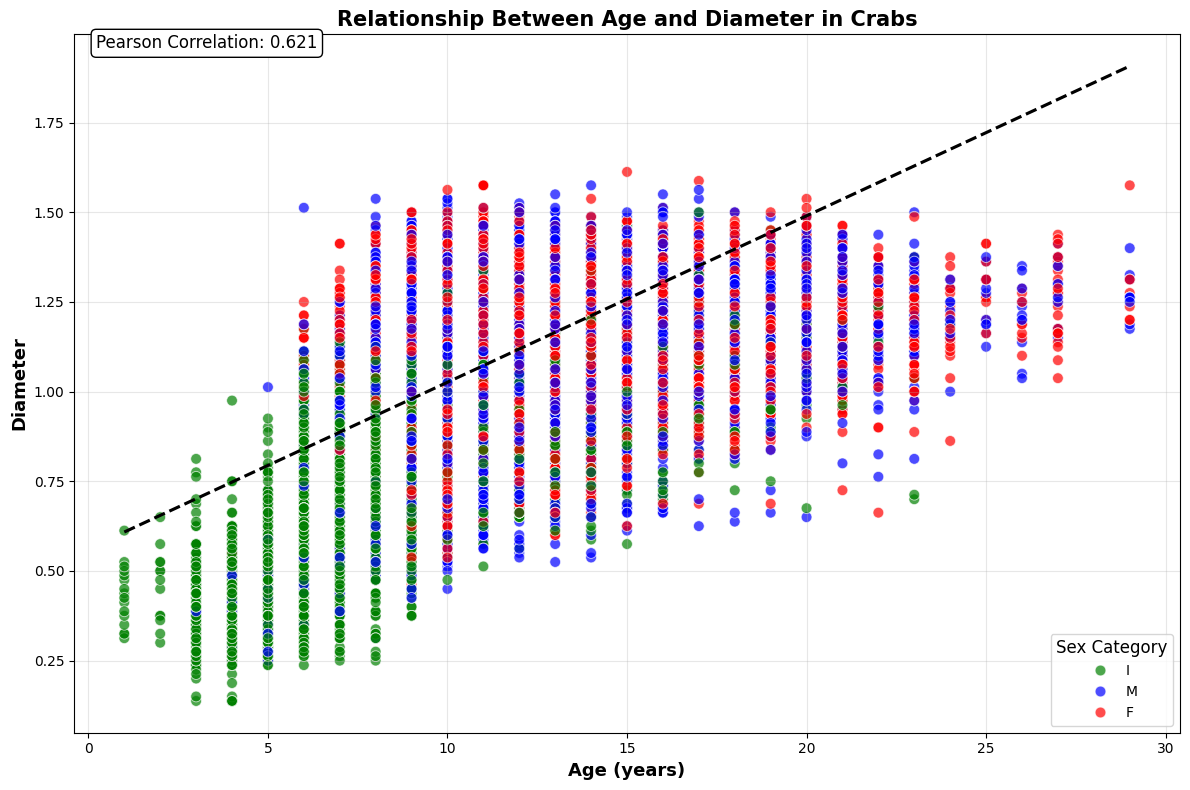

In [39]:
# plot the graph here

plt.figure(figsize=(12, 8))


sns.scatterplot(data=df, x='Age', y='Diameter', hue='Sex',
                palette={'F': 'red', 'M': 'blue', 'I': 'green'},
                alpha=0.7, s=60)


sns.regplot(data=df, x='Age', y='Diameter',
            scatter=False, ci=None, line_kws={'color': 'black', 'linestyle': '--'})

plt.xlabel('Age (years)', fontsize=13, fontweight='bold')
plt.ylabel('Diameter', fontsize=13, fontweight='bold')
plt.title('Relationship Between Age and Diameter in Crabs', fontsize=15, fontweight='bold')


correlation = df['Age'].corr(df['Diameter'])
plt.text(0.02, 0.98, f'Pearson Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.grid(alpha=0.3)
plt.legend(title='Sex Category', title_fontsize=12)
plt.tight_layout()
plt.show()

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [40]:
# write code here

print("CORRELATION MATRIX ANALYSIS")
print("=" * 50)

correlation_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:")
print(correlation_matrix)

print("\n" + "=" * 60)
print("FORMATTED CORRELATION MATRIX")
print("=" * 60)

print(correlation_matrix.round(3))

CORRELATION MATRIX ANALYSIS
Correlation Matrix:
                  Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.989418  0.918402  0.936407        0.915529   
Diameter        0.989418  1.000000  0.921415  0.938273        0.914199   
Height          0.918402  0.921415  1.000000  0.902231        0.864457   
Weight          0.936407  0.938273  0.902231  1.000000        0.971242   
Shucked Weight  0.915529  0.914199  0.864457  0.971242        1.000000   
Viscera Weight  0.917872  0.918357  0.883557  0.971037        0.942576   
Shell Weight    0.916954  0.922683  0.903847  0.965493        0.910317   
Age             0.612374  0.620800  0.637759  0.600839        0.502877   

                Viscera Weight  Shell Weight       Age  
Length                0.917872      0.916954  0.612374  
Diameter              0.918357      0.922683  0.620800  
Height                0.883557      0.903847  0.637759  
Weight                0.971037      0.965493  0.600839  


If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [41]:
# write code here

print("CREATING 'LOST WEIGHT' COLUMN")
print("=" * 50)

lost_weight = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])

df['Lost Weight'] = lost_weight.apply(lambda x: 0 if x <= 0 else 1)

print(f"Lost Weight column created successfully!")
print(f"Values distribution:")
print(df['Lost Weight'].value_counts().sort_index())

current_columns = df.columns.tolist()
print(f"\nOriginal column order: {current_columns}")

shell_weight_idx = current_columns.index('Shell Weight')
age_idx = current_columns.index('Age')

print(f"Shell Weight index: {shell_weight_idx}")
print(f"Age index: {age_idx}")

current_columns.remove('Lost Weight')

new_columns = (current_columns[:shell_weight_idx+1] +
               ['Lost Weight'] +
               current_columns[shell_weight_idx+1:])

df = df[new_columns]

print(f"\nNew column order: {df.columns.tolist()}")
print(f"Dataset shape: {df.shape}")

CREATING 'LOST WEIGHT' COLUMN
Lost Weight column created successfully!
Values distribution:
Lost Weight
0     9139
1    64888
Name: count, dtype: int64

Original column order: ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age', 'Lost Weight']
Shell Weight index: 7
Age index: 8

New column order: ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']
Dataset shape: (74027, 10)


In [42]:
# Verify the new column placement and values
print("VERIFICATION OF 'LOST WEIGHT' COLUMN")
print("=" * 50)

# Check the column order
print("Current column order:")
for i, col in enumerate(df.columns):
    print(f"  {i}. {col}")

# Verify Lost Weight is between Shell Weight and Age
shell_weight_pos = df.columns.get_loc('Shell Weight')
lost_weight_pos = df.columns.get_loc('Lost Weight')
age_pos = df.columns.get_loc('Age')

print(f"\nPosition verification:")
print(f"  Shell Weight: position {shell_weight_pos}")
print(f"  Lost Weight: position {lost_weight_pos}")
print(f"  Age: position {age_pos}")

if shell_weight_pos < lost_weight_pos < age_pos:
    print("SUCCESS: Lost Weight is correctly placed between Shell Weight and Age!")
else:
    print("ERROR: Column placement is incorrect!")

# Show value distribution
print(f"\nLost Weight value counts:")
print(df['Lost Weight'].value_counts().sort_index())

# Show first few rows with the new column
print(f"\nFirst 5 rows with new column:")
print(df[['Shell Weight', 'Lost Weight', 'Age']].head())


VERIFICATION OF 'LOST WEIGHT' COLUMN
Current column order:
  0. Sex
  1. Length
  2. Diameter
  3. Height
  4. Weight
  5. Shucked Weight
  6. Viscera Weight
  7. Shell Weight
  8. Lost Weight
  9. Age

Position verification:
  Shell Weight: position 7
  Lost Weight: position 8
  Age: position 9
SUCCESS: Lost Weight is correctly placed between Shell Weight and Age!

Lost Weight value counts:
Lost Weight
0     9139
1    64888
Name: count, dtype: int64

First 5 rows with new column:
   Shell Weight  Lost Weight  Age
0      8.348928            1    9
1      3.401940            1    8
2      6.662133            1    9
3     14.996885            1   11
4      5.953395            1    8


In [43]:
# Detailed analysis of weight components
print("DETAILED WEIGHT COMPONENTS ANALYSIS")
print("=" * 50)

actual_lost_weight = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])

print("Weight Components Summary:")
print(f"Total Weight - mean: {df['Weight'].mean():.2f}")
print(f"Shucked Weight - mean: {df['Shucked Weight'].mean():.2f}")
print(f"Viscera Weight - mean: {df['Viscera Weight'].mean():.2f}")
print(f"Shell Weight - mean: {df['Shell Weight'].mean():.2f}")
print(f"Actual Lost Weight - mean: {actual_lost_weight.mean():.2f}")

print(f"\nLost Weight Statistics:")
print(f"Crabs with weight loss (Lost Weight = 1): {(df['Lost Weight'] == 1).sum()}")
print(f"Crabs with no weight loss (Lost Weight = 0): {(df['Lost Weight'] == 0).sum()}")
print(f"Percentage with weight loss: {(df['Lost Weight'] == 1).sum() / len(df) * 100:.2f}%")

# Show some examples
print(f"\nExamples of crabs with weight discrepancies:")
sample = df[actual_lost_weight != 0][['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight']].head(10)
print(sample)

DETAILED WEIGHT COMPONENTS ANALYSIS
Weight Components Summary:
Total Weight - mean: 23.39
Shucked Weight - mean: 10.11
Viscera Weight - mean: 5.06
Shell Weight - mean: 6.73
Actual Lost Weight - mean: 1.50

Lost Weight Statistics:
Crabs with weight loss (Lost Weight = 1): 64888
Crabs with no weight loss (Lost Weight = 0): 9139
Percentage with weight loss: 87.65%

Examples of crabs with weight discrepancies:
      Weight  Shucked Weight  Viscera Weight  Shell Weight  Lost Weight
0  28.973189       12.728926        6.647958      8.348928            1
1  10.418441        4.521745        2.324659      3.401940            1
2  24.777463       11.339800        5.556502      6.662133            1
3  50.660556       20.354941       10.991839     14.996885            1
4  23.289114       11.977664        4.507570      5.953395            1
5  28.845616       13.409313        6.789705      7.937860            1
6  30.022120       11.935140        7.342521      8.646598            1
7  18.299602  

To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

/tmp/ipython-input-4170928794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lost Weight Str', y='Age', data=df_plot,


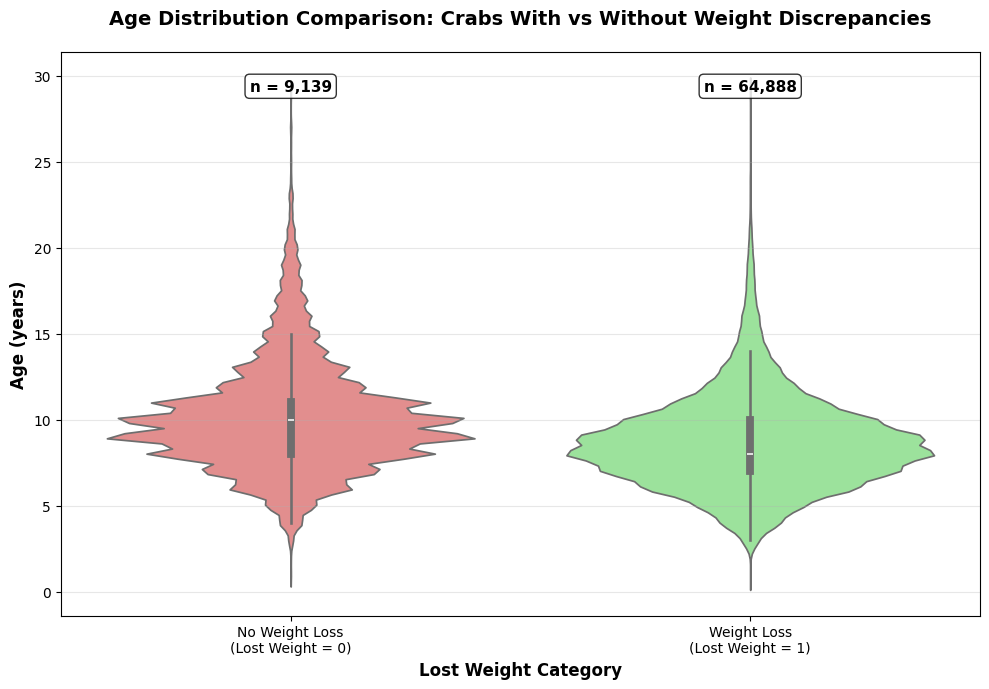

In [45]:
# plot the graph here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

df_plot = df.copy()
df_plot['Lost Weight Str'] = df_plot['Lost Weight'].astype(str)

sns.violinplot(x='Lost Weight Str', y='Age', data=df_plot,
               palette={'0': 'lightgreen', '1': 'lightcoral'})

plt.xlabel('Lost Weight Category', fontsize=12, fontweight='bold')
plt.ylabel('Age (years)', fontsize=12, fontweight='bold')
plt.title('Age Distribution Comparison: Crabs With vs Without Weight Discrepancies',
          fontsize=14, fontweight='bold', pad=20)

# Improve x-axis labels
plt.xticks(ticks=[0, 1], labels=['No Weight Loss\n(Lost Weight = 0)', 'Weight Loss\n(Lost Weight = 1)'])

# Add sample size annotations
count_0 = len(df[df['Lost Weight'] == 0])
count_1 = len(df[df['Lost Weight'] == 1])

plt.text(0, plt.ylim()[1] * 0.95, f'n = {count_0:,}',
         ha='center', va='top', fontweight='bold', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(1, plt.ylim()[1] * 0.95, f'n = {count_1:,}',
         ha='center', va='top', fontweight='bold', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

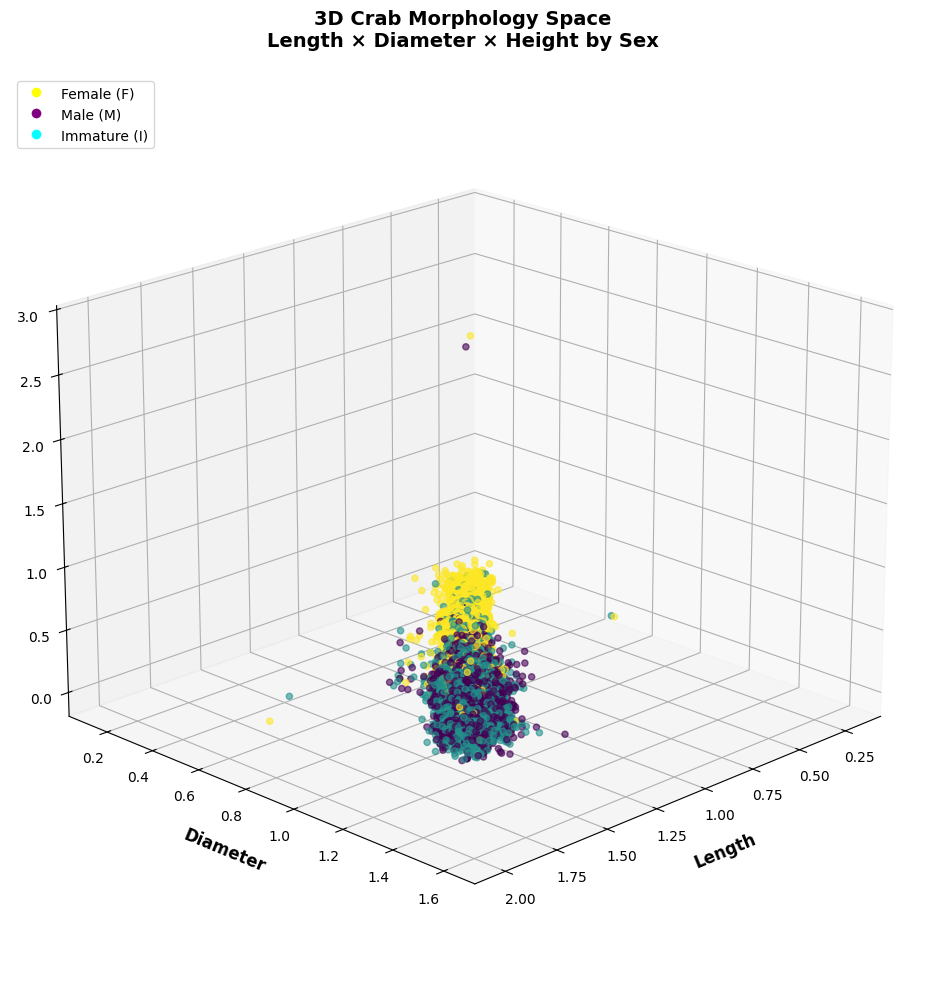

In [47]:
# creativity batao

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Length'], df['Diameter'], df['Height'],
                    c=df['Sex'].map({'F': 0, 'M': 1, 'I': 2}),
                    cmap='viridis', alpha=0.6, s=20)

ax.set_xlabel('Length', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Diameter', fontsize=12, fontweight='bold', labelpad=10)
ax.set_zlabel('Height', fontsize=12, fontweight='bold', labelpad=10)

ax.set_title('3D Crab Morphology Space\nLength × Diameter × Height by Sex',
            fontsize=14, fontweight='bold', pad=20)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor='yellow', markersize=8, label='Female (F)'),
                  plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor='purple', markersize=8, label='Male (M)'),
                  plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor='cyan', markersize=8, label='Immature (I)')]

ax.legend(handles=legend_elements, loc='upper left')

# Rotate for better view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()



This heatmap shows the correlation of different features with "Age". Key insights:

1. **Shell Weight** has the highest correlation with **Age** (0.66), making it a strong predictor.
2. **Height**, **Diameter**, **Length**, and **Weight** have moderate correlations, making them useful for prediction.
3. **Lost_Weight** has a low correlation (0.15), suggesting it may be less useful as a feature.

 It helps quickly identify important features for machine learning by showing correlations with the target variable.


In [ ]:
# Targeted Correlation Heatmap focusing on Age relationships
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)

age_correlations = corr_matrix['Age'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))

colors = plt.cm.RdYlBu_r((age_correlations.values + 1) / 2)  # Color scale from -1 to 1

bars = plt.barh(range(len(age_correlations)), age_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(age_correlations)), age_correlations.index, fontsize=11)
plt.xlabel('Correlation Coefficient with Age', fontsize=12, fontweight='bold')
plt.title('Feature Correlations with Crab Age', fontsize=14, fontweight='bold', pad=20)

for i, (bar, value) in enumerate(zip(bars, age_correlations.values)):
    plt.text(value + 0.01 * (1 if value >= 0 else -1), i,
             f'{value:.3f}', va='center', fontweight='bold', fontsize=10,
             color='black' if abs(value) < 0.5 else 'white')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.text(0.02, 0.02, 'Strong Negative ← → Strong Positive',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [48]:
# write code here
# Apply One-Hot Encoding to the Sex column
print("APPLYING ONE-HOT ENCODING TO 'SEX' COLUMN")
print("=" * 50)

print("Before one-hot encoding:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nUnique values in 'Sex' column: {df['Sex'].unique()}")
print(f"Value counts:\n{df['Sex'].value_counts()}")

df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

print("\n" + "=" * 50)
print("After one-hot encoding:")
print(f"Dataset shape: {df_encoded.shape}")
print(f"New columns: {df_encoded.columns.tolist()}")

sex_columns = [col for col in df_encoded.columns if col.startswith('Sex_')]
print(f"\nOne-hot encoded columns: {sex_columns}")

print(f"\nFirst 5 rows with one-hot encoding:")
print(df_encoded[['Sex_F', 'Sex_I', 'Sex_M']].head(10))

print(f"\nSUCCESS: One-hot encoding completed!")
print(f"   • Original 'Sex' column removed")
print(f"   • New columns created: {sex_columns}")
print(f"   • Each row now has 1 in one column and 0 in others")

APPLYING ONE-HOT ENCODING TO 'SEX' COLUMN
Before one-hot encoding:
Dataset shape: (74027, 10)
Columns: ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']

Unique values in 'Sex' column: ['I' 'M' 'F']
Value counts:
Sex
M    27084
I    23933
F    23010
Name: count, dtype: int64

After one-hot encoding:
Dataset shape: (74027, 12)
New columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M']

One-hot encoded columns: ['Sex_F', 'Sex_I', 'Sex_M']

First 5 rows with one-hot encoding:
   Sex_F  Sex_I  Sex_M
0  False   True  False
1  False   True  False
2  False  False   True
3   True  False  False
4  False   True  False
5  False  False   True
6  False  False   True
7  False   True  False
8   True  False  False
9  False  False   True

SUCCESS: One-hot encoding completed!
   • Original 'Sex' column removed
   • New columns created

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [49]:
# write code here
print("APPLYING NORMALIZATION (MIN-MAX SCALING)")
print("=" * 50)

print("Before Normalization:")
print("Dataset shape:", df_encoded.shape)
print("\nOriginal data statistics:")
print(df_encoded.describe().round(3))

numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns to normalize: {numeric_columns}")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print("\n" + "=" * 50)
print("After Normalization:")
print("\nNormalized data statistics:")
print(df_normalized.describe().round(3))

print(f"\nVERIFICATION OF NORMALIZATION:")
print(f"• All values are now between 0 and 1")
print(f"• Minimum values: {df_normalized[numeric_columns].min().min():.3f}")
print(f"• Maximum values: {df_normalized[numeric_columns].max().max():.3f}")

sample_columns = ['Length', 'Diameter', 'Weight', 'Age']
print(f"\nBEFORE vs AFTER NORMALIZATION (Sample):")
comparison = pd.DataFrame({
    'Original_Min': df_encoded[sample_columns].min(),
    'Original_Max': df_encoded[sample_columns].max(),
    'Normalized_Min': df_normalized[sample_columns].min(),
    'Normalized_Max': df_normalized[sample_columns].max()
})
print(comparison.round(3))

APPLYING NORMALIZATION (MIN-MAX SCALING)
Before Normalization:
Dataset shape: (74027, 12)

Original data statistics:
          Length   Diameter     Height     Weight  Shucked Weight  \
count  74027.000  74027.000  74027.000  74027.000       74027.000   
mean       1.318      1.025      0.348     23.392          10.107   
std        0.288      0.237      0.092     12.644           5.616   
min        0.188      0.138      0.012      0.057           0.028   
25%        1.150      0.888      0.300     13.438           5.712   
50%        1.375      1.075      0.362     23.799           9.908   
75%        1.538      1.200      0.412     32.163          14.040   
max        2.013      1.612      2.825     80.102          42.184   

       Viscera Weight  Shell Weight  Lost Weight        Age  
count       74027.000     74027.000    74027.000  74027.000  
mean            5.060         6.726        0.877      9.970  
std             2.792         3.583        0.329      3.174  
min          

For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [51]:

# one hot encode the Sex column before running the next cell
print(" ONE-HOT ENCODING 'SEX' COLUMN")
print("=" * 50)

print("Before one-hot encoding:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Sex column unique values: {df['Sex'].unique()}")
df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

print("\nAfter one-hot encoding:")
print(f"Dataset shape: {df_encoded.shape}")
print(f"New columns: {df_encoded.columns.tolist()}")
sex_columns = [col for col in df_encoded.columns if col.startswith('Sex_')]
print(f"\nOne-hot encoded columns: {sex_columns}")
print(f"First 5 rows of encoded columns:")
print(df_encoded[sex_columns].head())

print(f"\nOne-hot encoding completed successfully!")

 ONE-HOT ENCODING 'SEX' COLUMN
Before one-hot encoding:
Dataset shape: (74027, 10)
Columns: ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']
Sex column unique values: ['I' 'M' 'F']

After one-hot encoding:
Dataset shape: (74027, 12)
New columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M']

One-hot encoded columns: ['Sex_F', 'Sex_I', 'Sex_M']
First 5 rows of encoded columns:
   Sex_F  Sex_I  Sex_M
0  False   True  False
1  False   True  False
2  False  False   True
3   True  False  False
4  False   True  False

One-hot encoding completed successfully!


In [53]:
print("APPLYING NORMALIZATION")
print("=" * 50)

print("Before Normalization - Dataset info:")
print(f"Shape: {df_encoded.shape}")
print(f"All columns: {df_encoded.columns.tolist()}")

numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nAll numeric columns to normalize: {numeric_columns}")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_encoded.copy()

df_normalized[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print("\nAfter Normalization:")
print(f"Dataset shape: {df_normalized.shape}")

print(f"\nNORMALIZATION VERIFICATION:")
print(f"All numeric values are now in range [0, 1]")
print(f"Minimum value: {df_normalized[numeric_columns].min().min():.6f}")
print(f"Maximum value: {df_normalized[numeric_columns].max().max():.6f}")

print(f"\nONE-HOT ENCODED COLUMNS AFTER NORMALIZATION:")
print("(They remain as 0 or 1 since they were already in this range)")
print(df_normalized[sex_columns].head())

APPLYING NORMALIZATION
Before Normalization - Dataset info:
Shape: (74027, 12)
All columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M']

All numeric columns to normalize: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']

After Normalization:
Dataset shape: (74027, 12)

NORMALIZATION VERIFICATION:
All numeric values are now in range [0, 1]
Minimum value: 0.000000
Maximum value: 1.000000

ONE-HOT ENCODED COLUMNS AFTER NORMALIZATION:
(They remain as 0 or 1 since they were already in this range)
   Sex_F  Sex_I  Sex_M
0  False   True  False
1  False   True  False
2  False  False   True
3   True  False  False
4  False   True  False


In [55]:
# DEMONSTRATION: Why one-hot encoded columns are unaffected by normalization
print("WHY ONE-HOT ENCODED COLUMNS ARE UNAFFECTED BY NORMALIZATION")
print("=" * 60)

#mathematical reason
sample_sex_col = 'Sex_F'

print(f"Analysis of '{sample_sex_col}' column:")
print(f"Original min value: {df_encoded[sample_sex_col].min()}")
print(f"Original max value: {df_encoded[sample_sex_col].max()}")

# Min-Max normalization formula: (x - min) / (max - min)
# For one-hot encoded columns: min=0, max=1
# So: (x - 0) / (1 - 0) = x / 1 = x

print(f"\nNORMALIZATION CALCULATION:")
print(f"Formula: (x - min) / (max - min)")
print(f"For one-hot: (x - 0) / (1 - 0) = x")
print(f"So values remain unchanged!")

print(f"\nVERIFICATION:")
print(f"Original '{sample_sex_col}' values: {df_encoded[sample_sex_col].unique()}")
print(f"Normalized '{sample_sex_col}' values: {df_normalized[sample_sex_col].unique()}")

print(f"\nCONCLUSION:")
print("One-hot encoded columns are already in [0,1] range")
print("Normalization doesn't change their values")
print("They remain perfectly suitable for machine learning")

WHY ONE-HOT ENCODED COLUMNS ARE UNAFFECTED BY NORMALIZATION
Analysis of 'Sex_F' column:
Original min value: False
Original max value: True

NORMALIZATION CALCULATION:
Formula: (x - min) / (max - min)
For one-hot: (x - 0) / (1 - 0) = x
So values remain unchanged!

VERIFICATION:
Original 'Sex_F' values: [False  True]
Normalized 'Sex_F' values: [False  True]

CONCLUSION:
One-hot encoded columns are already in [0,1] range
Normalization doesn't change their values
They remain perfectly suitable for machine learning


In [57]:
# FINAL DATASET OVERVIEW
print("FINAL PREPROCESSED DATASET OVERVIEW")
print("=" * 50)

print("Dataset Summary:")
print(f"Shape: {df_normalized.shape}")
print(f"Columns: {df_normalized.columns.tolist()}")

print(f"\nData Types:")
print(df_normalized.dtypes)

print(f"\nValue Ranges After Normalization:")
for col in ['Length', 'Diameter', 'Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M']:
    if col in df_normalized.columns:
        min_val = df_normalized[col].min()
        max_val = df_normalized[col].max()
        print(f"  {col}: {min_val:.3f} to {max_val:.3f}")

print(f"\nPREPROCESSING COMPLETE!")
print("• One-hot encoding: done")
print("• Normalization:  dpne")
print("• Data ready for machine learning: done")

FINAL PREPROCESSED DATASET OVERVIEW
Dataset Summary:
Shape: (74027, 12)
Columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M']

Data Types:
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Lost Weight       float64
Age               float64
Sex_F                bool
Sex_I                bool
Sex_M                bool
dtype: object

Value Ranges After Normalization:
  Length: 0.000 to 1.000
  Diameter: 0.000 to 1.000
  Weight: 0.000 to 1.000
  Age: 0.000 to 1.000
  Sex_F: 0.000 to 1.000
  Sex_I: 0.000 to 1.000
  Sex_M: 0.000 to 1.000

PREPROCESSING COMPLETE!
• One-hot encoding: done
• Normalization:  dpne
• Data ready for machine learning: done


Standardise df_std such that the one hot label encoded columns aren't affected.

In [60]:
# write code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Standardizing numerical columns (excluding one-hot encoded columns)")
print("=" * 60)

print("Before standardization:")
print(f"Dataset shape: {df_encoded.shape}")

numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
one_hot_columns = [col for col in df_encoded.columns if col.startswith('Sex_')]
numerical_columns = [col for col in numeric_columns if col not in one_hot_columns]

print(f"Numerical columns to standardize: {numerical_columns}")
print(f"One-hot columns to preserve: {one_hot_columns}")

df_std = df_encoded.copy()

scaler = StandardScaler()
df_std[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("\nAfter standardization:")
print(f"Dataset shape: {df_std.shape}")

print("\nStandardization verification:")
print("Numerical columns (mean ~0, std ~1):")
numerical_stats = df_std[numerical_columns].describe()
print(numerical_stats.loc[['mean', 'std']].round(3))

if one_hot_columns:
    print("\nOne-hot columns (unchanged):")
    one_hot_stats = df_std[one_hot_columns].describe()
    print(one_hot_stats.round(3))

print("\nStandardization completed successfully")

Standardizing numerical columns (excluding one-hot encoded columns)
Before standardization:
Dataset shape: (74027, 12)
Numerical columns to standardize: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']
One-hot columns to preserve: ['Sex_F', 'Sex_I', 'Sex_M']

After standardization:
Dataset shape: (74027, 12)

Standardization verification:
Numerical columns (mean ~0, std ~1):
      Length  Diameter  Height  Weight  Shucked Weight  Viscera Weight  \
mean     0.0      -0.0    -0.0    -0.0            -0.0            -0.0   
std      1.0       1.0     1.0     1.0             1.0             1.0   

      Shell Weight  Lost Weight  Age  
mean          -0.0         -0.0 -0.0  
std            1.0          1.0  1.0  

One-hot columns (unchanged):
        Sex_F  Sex_I  Sex_M
count   74027  74027  74027
unique      2      2      2
top     False  False  False
freq    51017  50094  46943

Standardization completed successfully


#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

In [61]:
# One Hot Encoding vs Label Encoding Comparison

print("One Hot Encoding vs Label Encoding")
print("=" * 40)

print("ONE HOT ENCODING (Current Approach):")
print("- Creates separate binary column for each category")
print("- Example: Sex_F, Sex_I, Sex_M columns")
print("- No ordinal relationship assumed")
print("- Prevents false ordinal relationships")
print("- Increases dimensionality (k columns for k categories)")
print("- Preferred for nominal categorical data")

print("\nLABEL ENCODING (Alternative):")
print("- Assigns integer to each category (F=0, I=1, M=2)")
print("- Single column remains")
print("- May imply ordinal relationship where none exists")
print("- Algorithms might misinterpret order as meaningful")
print("- Can work for tree-based models")
print("- Risky for linear models, distance-based algorithms")

print("\nCURRENT DATASET - One Hot Encoding Applied:")
print(f"Original 'Sex' column replaced with: {one_hot_columns}")
print("Each crab has exactly one '1' across these three columns")

print("\nWHY ONE HOT ENCODING FOR THIS DATASET:")
print("- Sex categories (F, I, M) have no natural order")
print("- No meaningful 'distance' between Male and Female")
print("- Prevents model from assuming M > I > F")
print("- Standard practice for nominal categorical variables")

print("\nWHEN TO USE LABEL ENCODING:")
print("- Categories have natural order (Low, Medium, High)")
print("- Tree-based algorithms that don't assume ordinality")
print("- Dealing with high cardinality features")
print("- When dimensionality reduction is critical")

One Hot Encoding vs Label Encoding
ONE HOT ENCODING (Current Approach):
- Creates separate binary column for each category
- Example: Sex_F, Sex_I, Sex_M columns
- No ordinal relationship assumed
- Prevents false ordinal relationships
- Increases dimensionality (k columns for k categories)
- Preferred for nominal categorical data

LABEL ENCODING (Alternative):
- Assigns integer to each category (F=0, I=1, M=2)
- Single column remains
- May imply ordinal relationship where none exists
- Algorithms might misinterpret order as meaningful
- Can work for tree-based models
- Risky for linear models, distance-based algorithms

CURRENT DATASET - One Hot Encoding Applied:
Original 'Sex' column replaced with: ['Sex_F', 'Sex_I', 'Sex_M']
Each crab has exactly one '1' across these three columns

WHY ONE HOT ENCODING FOR THIS DATASET:
- Sex categories (F, I, M) have no natural order
- No meaningful 'distance' between Male and Female
- Prevents model from assuming M > I > F
- Standard practice for n